## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 15
---------------------------------------

GOALS:

1. Practice making plots
2. Add trendlines to plots
3. Explore Linear Regression

----------------------------------------------------------

This homework has **4 questions** and **3 exercises**.


## Help with Algorithms!

Implementing algorithms can be very difficult. I would highly suggest that you **start by recreating the code that you see in the lecture**... copy and paste it and make sure it runs. THEN try to alter that code to do the exercises.

In [149]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'



# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [150]:
# Load the Data
file_location = 'https://joannabieri.com/introdatascience/data/paris-paintings.csv'
DF_raw_paintings = pd.read_csv(file_location,na_filter=False)

In [101]:
DF_raw_paintings

name   sale  lot  position dealer  year origin_author origin_cat  \
0        L1764-2  L1764    2  0.032787      L  1764             F          O   
1        L1764-3  L1764    3  0.049180      L  1764             I          O   
2        L1764-4  L1764    4  0.065574      L  1764             X          O   
3       L1764-5a  L1764    5  0.081967      L  1764             F          O   
4       L1764-5b  L1764    5  0.081967      L  1764             F          O   
...          ...    ...  ...       ...    ...   ...           ...        ...   
3388   R1764-498  R1764  498  0.992032      R  1764             F          O   
3389   R1764-499  R1764  499  0.994024      R  1764             F          O   
3390   R1764-500  R1764  500  0.996016      R  1764             F          O   
3391  R1764-502a  R1764  502  1.000000      R  1764             F          O   
3392  R1764-502b  R1764  502  1.000000      R  1764             F          O   

     school_pntg  diff_origin  ...  peasant  othgenre  singlefig portrait  \
0              F            1  ...        0         0          0        0   
1              I            1  ...        0         1          0        0   
2           D/FL            1  ...        0         0          0        0   
3              F            1  ...        0         0          0        0   
4              F            1  ...        0         0          0        0   
...          ...          ...  ...      ...       ...        ...      ...   
3388           F            1  ...        0         0          0        0   
3389           F            1  ...        0         0          0        0   
3390           F            1  ...        0         0          0        0   
3391           F            1  ...        0         0          1        0   
3392           F            1  ...        0         0          1        0   

     still_life  discauth history allegory pastorale other  
0             0         0       0        0         0     0  
1             0         0       0        0         0     0  
2             0         0       0        0         0     0  
3             0         0       0        0         0     0  
4             0         0       0        0         0     0  
...         ...       ...     ...      ...       ...   ...  
3388          0         0       0        0         0     0  
3389          0         0       0        0         0     0  
3390          0         0       0        0         0     0  
3391          0         0       0        0         0     0  
3392          0         0       0        0         0     0  

[3393 rows x 61 columns]

In [102]:
# Make a copy of the data that we can start working on
DF = DF_raw_paintings.copy()

# Do something about all those different NaNs
DF.replace('',np.nan,inplace=True)
DF.replace('n/a',np.nan,inplace=True)
DF.replace('NaN',np.nan,inplace=True)

**Q1** Make historgrams of the height and width of all the paintings in the data set. You should be able to recreate the plots from the lecture without looking at the code.

Don't forget to change the values into floats liek we did in the lecture!

In [103]:
DF['Height_in'] = DF['Height_in'].apply(lambda x: float(x))
DF['Width_in'] = DF['Width_in'].apply(lambda x: float(x))

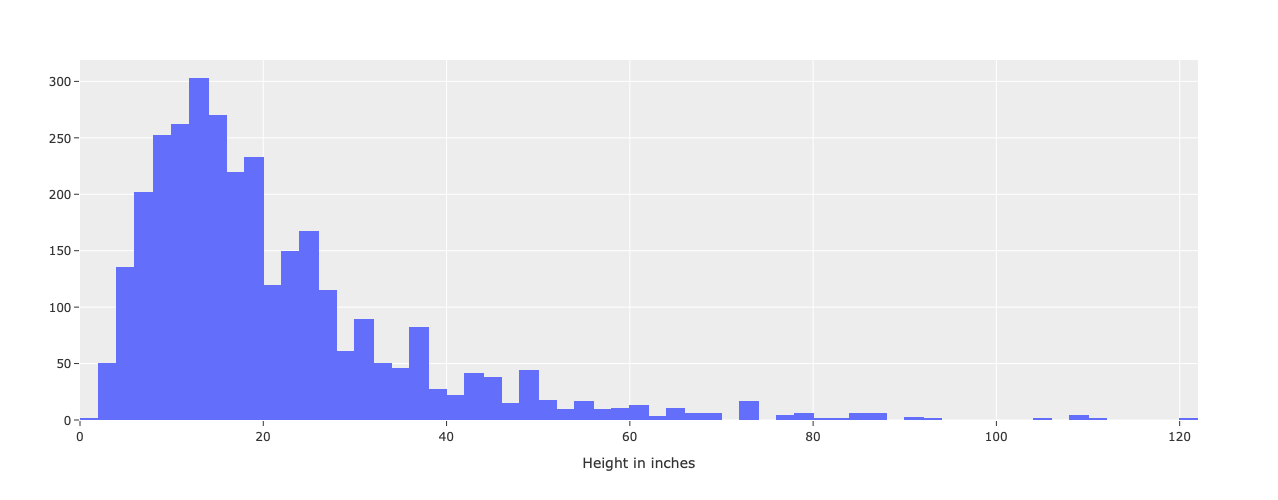

In [104]:
fig = px.histogram(DF,x='Height_in')

fig.update_layout(template="ggplot2",
                  xaxis_title="Height in inches",
                  yaxis_title="",
                 autosize=False,
                  width=800,
                  height=500)

fig.show()

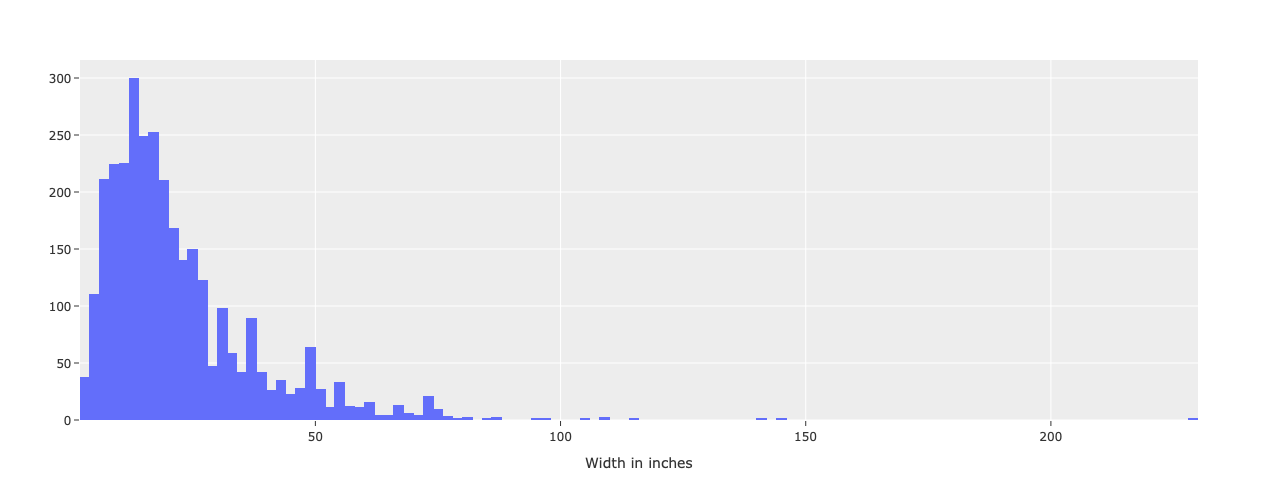

In [105]:
fig = px.histogram(DF,x='Width_in')

fig.update_layout(template="ggplot2",
                  xaxis_title="Width in inches",
                  yaxis_title="",
                 autosize=False,
                  width=1000,
                  height=500)

fig.show()

**Q2** Explain in words what these plots tell you about the data.

#### These plots show that average height of pantings is about 14 inches and the highet is skewed right with the majority of the data being between 4 and 30 inches in height. there is a possible outlier of height being 120 inches tall. The width data shows that the typical width is also about 14inches. this would tell us that most paintings tend to be the same width and height so most of these paintings are sqaure. there is one possible outleir with a width of 230 inches, but most of the data is skewed right just like the height data. 


**Q3** Make a scatter plot of the width vs the height like the one in the lecture. You should be able to recreate the plots here without looking at the code.

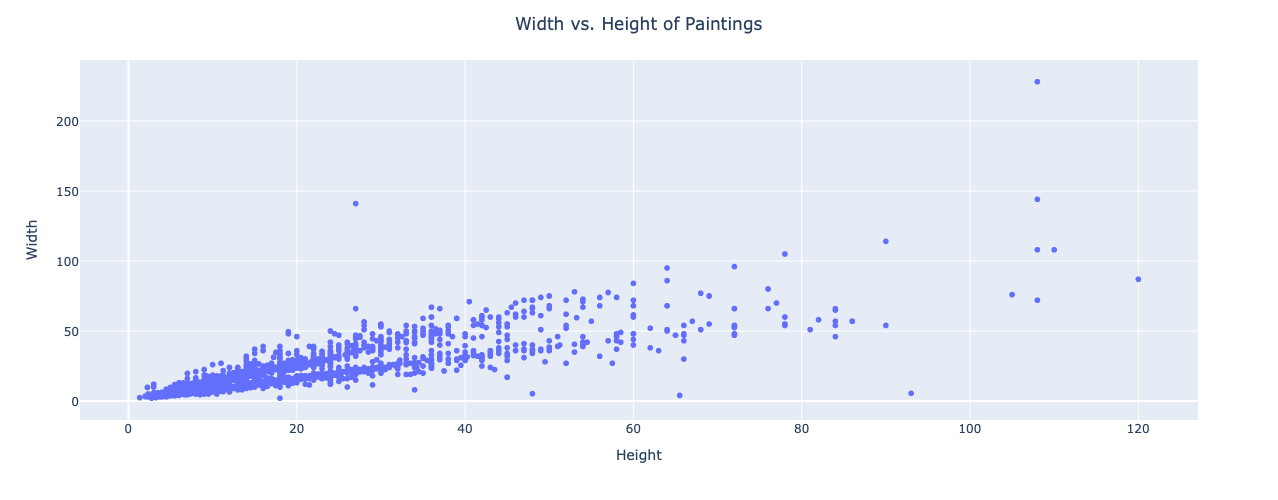

In [106]:
fig = px.scatter(DF,
                 x='Height_in',
                 y='Width_in',
                 hover_data='name')

fig.update_layout(title='Width vs. Height of Paintings',
                  title_x=0.5,
                  xaxis_title='Height',
                  yaxis_title="Width",
                  autosize=False,
                  width=800,
                  height=500)

fig.show()

The plot below uses Ordinary Least Squares fitting to find a reasonable line.

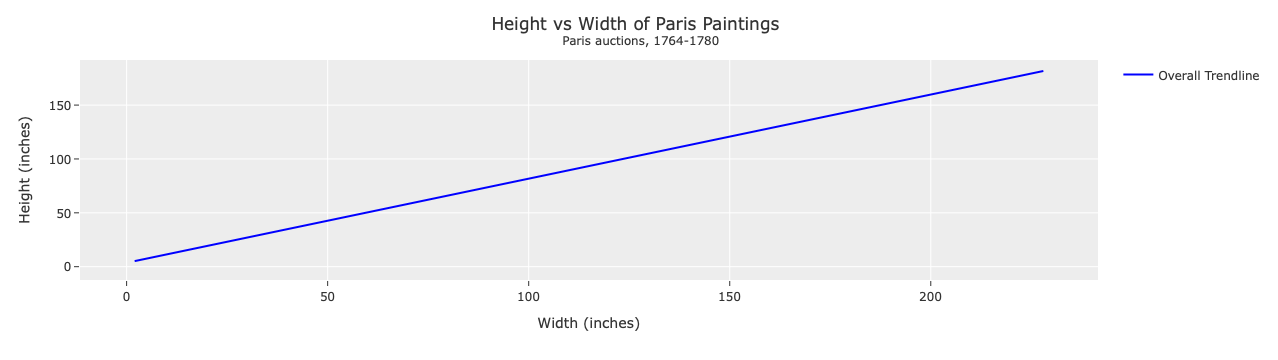

In [107]:
# Example Code Trendline

DF['Height_in'] = DF['Height_in'].apply(lambda x: float(x))
DF['Width_in'] = DF['Width_in'].apply(lambda x: float(x))

fig = px.scatter(DF,
                 x='Width_in',
                 y="Height_in",
                 color_discrete_sequence=['black'],
                trendline='ols',
                trendline_scope='overall',
                trendline_color_override='blue')


fig.update_layout(template="ggplot2",
                  title='Height vs Width of Paris Paintings <br><sup> Paris auctions, 1764-1780</sup>',
                  title_x=0.5,
                  xaxis_title="Width (inches)",
                  yaxis_title="Height (inches)")

fig.show()

So the line that "fits" this data based on the code we ran is

$$ H = 0.7808 W + 3.6214 $$

**Q4** Where do we think this prediction is most accurate? Where is there the most error? Explain why you think this?

#### I think this prediction is most accurate the closer to zero you go.This prediction is less accurate the further and further you go away from zero. this is because the corrolation to the trend line is better the closer to zero you are. I think that this is becuase in both of our histograms we could see that the larger the width or height the more likely that painting is going to be an outlier. This makes sense as we have a high volume of smaller paintings making the trend line represent the mass amount of data better than it represents the few obscure large paintings. 

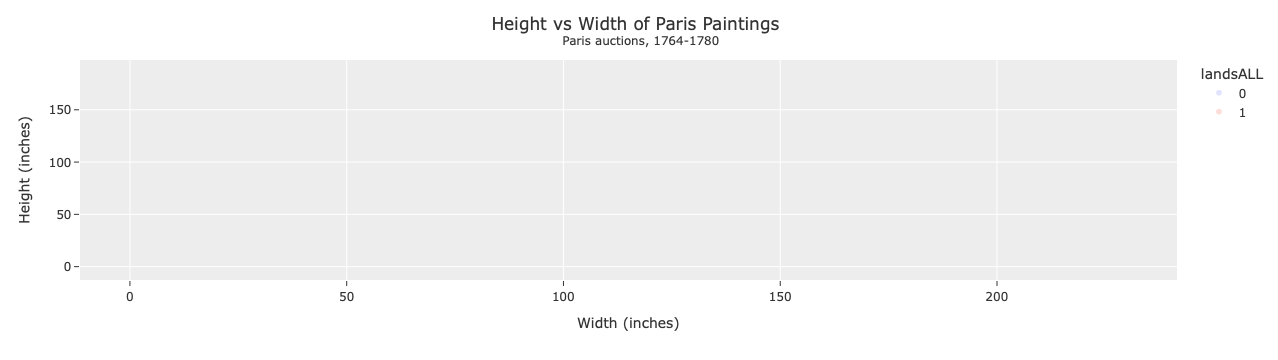

In [108]:
# Example Code Trendline with Categories
DF['landsALL'] = DF['landsALL'].apply(lambda x: str(x))

fig = px.scatter(DF,
                 x='Width_in',
                 y="Height_in",
                 color='landsALL',
                 opacity=0.2,
                 trendline='ols')

fig.update_layout(template="ggplot2",
                  title='Height vs Width of Paris Paintings <br><sup> Paris auctions, 1764-1780</sup>',
                  title_x=0.5,
                  xaxis_title="Width (inches)",
                  yaxis_title="Height (inches)")

fig.show()

IN the plot above we added another variable by coloring by whether or not there were landscape features in the painting. Then the trendline='ols' now gives us two lines. Here there is some evidence that if a painting in landscape, then it tends to be wider than it is tall.

**Exercise 1** Redo the plot above except color by some other variable that takes values of zero or one. Describe what the ols trendline tells you about the height and width of that type of painting. Eg. Does a painting being described as pastoral mean it is taller or wider than if it is not pastoral?

1. Choose a column that has just 0 and 1 as entries
2. Change those values into strings using apply and lambda
3. Do a value counts and talk about the balance in the data
4. Create a scatter plot with an old trendline colored by your focal column
5. Describe in words what you plot is telling you.

In [109]:
DF.columns

Index(['name', 'sale', 'lot', 'position', 'dealer', 'year', 'origin_author',
       'origin_cat', 'school_pntg', 'diff_origin', 'logprice', 'price',
       'count', 'subject', 'authorstandard', 'artistliving', 'authorstyle',
       'author', 'winningbidder', 'winningbiddertype', 'endbuyer', 'Interm',
       'type_intermed', 'Height_in', 'Width_in', 'Surface_Rect', 'Diam_in',
       'Surface_Rnd', 'Shape', 'Surface', 'material', 'mat', 'materialCat',
       'quantity', 'nfigures', 'engraved', 'original', 'prevcoll', 'othartist',
       'paired', 'figures', 'finished', 'lrgfont', 'relig', 'landsALL',
       'lands_sc', 'lands_elem', 'lands_figs', 'lands_ment', 'arch', 'mytho',
       'peasant', 'othgenre', 'singlefig', 'portrait', 'still_life',
       'discauth', 'history', 'allegory', 'pastorale', 'other'],
      dtype='object')

In [110]:
DF['pastorale'] = DF['pastorale'].apply(lambda x: str(x))

In [111]:
DF['pastorale'].value_counts()

pastorale
0    3386
1       7
Name: count, dtype: int64

#### We can see that there is a lot more paintings that are not pastorale than are pastorale. There is a signifigant amont of paintings that are pastorale. we can see that the number of paintings with a single figure are much more balanced than the pastorale paintings but it is still a much larger number of paitings that have more or less than a single figure. 

In [112]:
DF['singlefig'].value_counts()

singlefig
0    2983
1     410
Name: count, dtype: int64

In [113]:
DF['singlefig'] = DF['singlefig'].apply(lambda x: str(x))

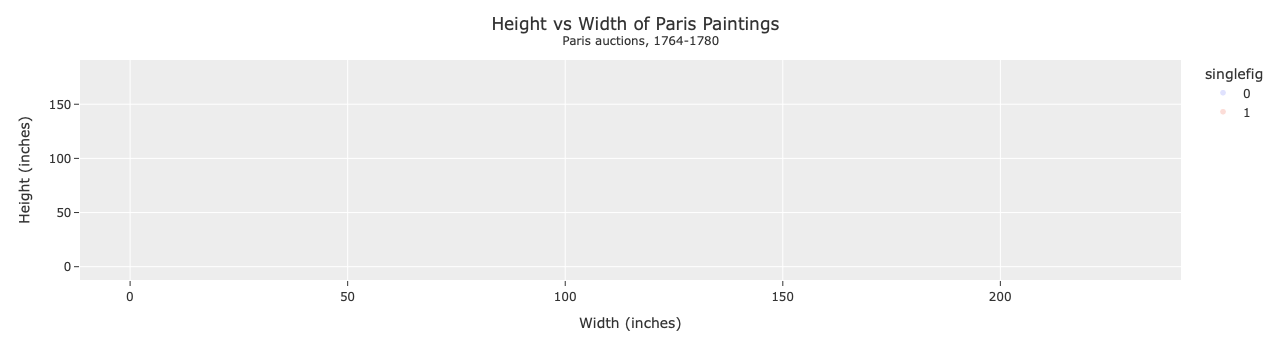

In [114]:
fig = px.scatter(DF,
                 x='Width_in',
                 y="Height_in",
                 color='singlefig',
                 opacity=0.2,
                 trendline='ols')

fig.update_layout(template="ggplot2",
                  title='Height vs Width of Paris Paintings <br><sup> Paris auctions, 1764-1780</sup>',
                  title_x=0.5,
                  xaxis_title="Width (inches)",
                  yaxis_title="Height (inches)")

fig.show()

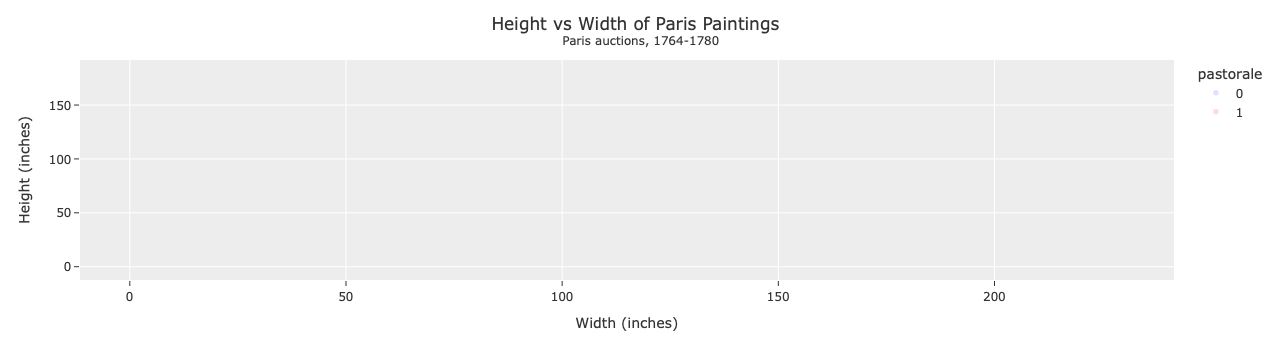

In [115]:
fig = px.scatter(DF,
                 x='Width_in',
                 y="Height_in",
                 color='pastorale',
                 opacity=0.2,
                 trendline='ols')

fig.update_layout(template="ggplot2",
                  title='Height vs Width of Paris Paintings <br><sup> Paris auctions, 1764-1780</sup>',
                  title_x=0.5,
                  xaxis_title="Width (inches)",
                  yaxis_title="Height (inches)")

fig.show()

#### We can see in the plots above that there does seem to be some kind of correlation between if the painting has a single figure or not and the relationship bewteen height and width. In the first plot we can see that the paintings in paris that have a single figure tend to have a larger height compared to width, this could be because paitings with a single figure tend to be portaits and therefor they are shorter in width than a landscape painting with more than one figure. the number of figures does seem to have some impact on the height width relationship and the two different trend lines that we see. In the second plot we can see that the 7 pastorale paintings have a very simular trend line to that of the group of paintings that have a larger height to width ratio. This looks like it could be a reason for the V we see in the data, but because there is such a small number of data points in the pastorales I dont think this could be a conclusion to make. 


## Install Scikit-Learn

Run the code below to install sklearn.

```{python}
    !conda install -y scikit-learn
```

In [116]:
!conda install -y scikit-learn


Retrieving notices: ...working... done
Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: unsuccessful attempt using repodata from current_repodata.json, retrying with next repodata source.
WARNING conda.models.version:get_matcher(563): Using .* with relational operator is superfluous and deprecated and will be removed in a future version of conda. Your spec was 1.9.0.*, but conda is ignoring the .* and treating it as 1.9.0
done
Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: - 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                                                \                                                                               | failed

UnsatisfiableError: The following specifications were found
to be incompatible w

In [117]:
# A new packages to import!
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import OneHotEncoder

**Exercise 2** Redo the Linear Regression from the lecture to see if you can use the size ('Surface') of the painting to predict the price.

1. Create a data frame with only the price and surface columns
2. Look at the data types
3. Preprocess the data - remove NaNs and change the Surface values to floats.
5. Train a linear regression model that takes as an input X = Surface Area and gives as an output y=price

           X = DF_model['Surface'].values.reshape(-1,1)
           y = DF_model['price'].values
7. Plot a scatter plot of Price vs Surface add in your predicted line
8. Find your slope and intercept
9. Look at the score

Interpret your results. Should you use a linear model to predict the price of a painting using the surface area?

*In the lecture you can see the scatter plot and score that I got.*


### Preprocessing the Data

Before you can build a model you need to do some cleaning and preprocessing of your data. Here are some important steps:

1. Select the variables that you wan to use (columns)
2. Decide what to do about NaNs or other strange data
3. (*advanced*) Think about rescaling and standardizing
4. Create the inputs and outputs (sometimes encode)
5. (*advanced*) Test - Train split

### Train the model

1. Create the base model, in this case LinearRegression()
2. Train the model using the training data
3. Look at the results.


In [28]:
DF.columns

Index(['name', 'sale', 'lot', 'position', 'dealer', 'year', 'origin_author',
       'origin_cat', 'school_pntg', 'diff_origin', 'logprice', 'price',
       'count', 'subject', 'authorstandard', 'artistliving', 'authorstyle',
       'author', 'winningbidder', 'winningbiddertype', 'endbuyer', 'Interm',
       'type_intermed', 'Height_in', 'Width_in', 'Surface_Rect', 'Diam_in',
       'Surface_Rnd', 'Shape', 'Surface', 'material', 'mat', 'materialCat',
       'quantity', 'nfigures', 'engraved', 'original', 'prevcoll', 'othartist',
       'paired', 'figures', 'finished', 'lrgfont', 'relig', 'landsALL',
       'lands_sc', 'lands_elem', 'lands_figs', 'lands_ment', 'arch', 'mytho',
       'peasant', 'othgenre', 'singlefig', 'portrait', 'still_life',
       'discauth', 'history', 'allegory', 'pastorale', 'other'],
      dtype='object')

In [87]:
my_columns = ['Surface','price']
DF_ex2= DF[my_columns]
DF_ex2

Surface  price
0     1091.5  360.0
1        252    6.0
2        208   12.0
3        252    6.0
4        252    6.0
...      ...    ...
3388     387   18.0
3389   214.5   25.0
3390     720   80.0
3391     621    5.0
3392     621    5.0

[3393 rows x 2 columns]

In [63]:
DF_ex2.dtypes

Surface     object
price      float64
dtype: object

In [88]:
print('Number of NaNs:')
print(DF_ex2.isna().sum().sum())
print('----------------------')

# What percent of the data is this?
print('Percent NaNs:')
print(DF_ex2.isna().sum().sum()/len(DF))
print('----------------------')

# I am going to drop these! This is a choice!
DF_ex2.dropna(inplace=True)
print('Number of NaNs after drop:')
print(DF_ex2.isna().sum().sum())
print('----------------------')

Number of NaNs:
176
----------------------
Percent NaNs:
0.051871500147362214
----------------------
Number of NaNs after drop:
0
----------------------


In [90]:
DF_ex2['Surface'] = DF['Surface'].apply(lambda x: float(x))

In [91]:
DF_ex2.dtypes                                                                      

Surface    float64
price      float64
dtype: object

In [92]:
   X = DF_ex2['Surface'].values.reshape(-1,1)
y = DF_ex2['price'].values

In [93]:
DF_ex2

Surface  price
0      1091.5  360.0
1       252.0    6.0
2       208.0   12.0
3       252.0    6.0
4       252.0    6.0
...       ...    ...
3388    387.0   18.0
3389    214.5   25.0
3390    720.0   80.0
3391    621.0    5.0
3392    621.0    5.0

[3217 rows x 2 columns]

In [94]:
LM = LinearRegression()
LM.fit(X, y)

LinearRegression()

In [95]:
LM.coef_

array([0.1876263])

In [96]:
LM.intercept_

660.1215276728364

In [97]:
surface = 33
surface = np.array(surface).reshape(-1,1)
LM.predict(surface)

array([666.31319543])

#### we can see from this prediction that if a paiting ahs a surface of 33 that the predicted price with this model is going to be about 666.313 dollars. For every 1 increase of surface it is predicted that the price will increase by about .187 on average. 

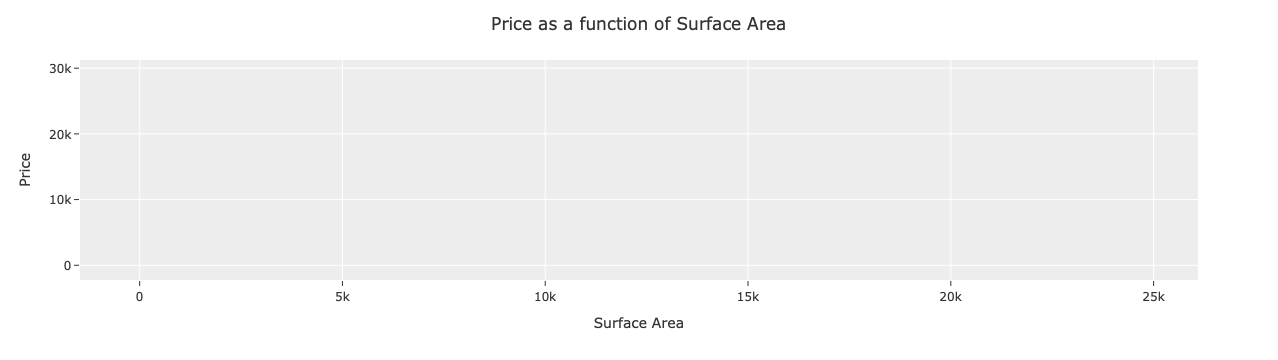

Model Score:
0.011141075251450583


In [151]:
my_columns = ['Surface','price']
DF_s = DF[my_columns]

DF_s.dropna(inplace=True)
DF_s['Surface'] = DF_s['Surface'].apply(lambda x: float(x))

fig = px.scatter(DF_s,
                 x='Surface',
                 y='price',
                 color_discrete_sequence=['black'],
                 opacity=0.2)

fig.update_layout(template="ggplot2",
                  title='Price as a function of Surface Area',
                  title_x=0.5,
                  xaxis_title='Surface Area',
                  yaxis_title='Price')


fig.show()

X = DF_s['Surface'].values.reshape(-1,1)
y = DF_s['price'].values

LM = LinearRegression()

LM.fit(X, y)

print('Model Score:')
print(LM.score(X,y))

#### We can see from the linear regression above that most of the paintings are below 5k in surface area. This linear regression has a modle score of about .0114 which is a very low corrolation score. This means that we probably should not use this regession formula to accuratley predict the price because our data is so heavly skewed to the left. This data is also quit noisy so it is hard to be certain of using this model to predict the price based upon the surface area. This makes a lot of sense also just from looking at the equation because it is saying that even if the surface area is zero, the price would be at least 660. 

#### It seems that there is a positive relationship between surface and price. this model has an inttercept of 660.12 and an coefficent of about .187. this means that for every increase in surface area the predicted price is going to increase by .187.

**Exercise 3** Redo the analysis for Linear Regression with more than one categorical value (from the lecture) except this time see if the school of the painting effects the overall size ('Surface') of the painting. Don't forget to drop the NaNs where we don't know the surface size and change the surface variables to floats.

1. Create a data frame with only the school and surface columns
2. Look at the data types
3. Preprocess the data - remove NaNs and change the Surface values to floats.
5. Train a linear regression model that takes as an input X = School and gives as an output y= surface area, now you need to one hot encode the X values!

           X = DF_model['school_pntg'].values.reshape(-1,1)
           y = DF_model['Surface'].values
   
9. Look at the output, what does it mean?
        - Which school of paintings on average are largest? smallest?

*You can see the outputs of my code in the lecture*


In [163]:
from sklearn.preprocessing import OneHotEncoder

In [164]:
my_columns = ['school_pntg','Surface']
DF_school= DF[my_columns]
DF_school

school_pntg Surface
0              F  1091.5
1              I     252
2           D/FL     208
3              F     252
4              F     252
...          ...     ...
3388           F     387
3389           F   214.5
3390           F     720
3391           F     621
3392           F     621

[3393 rows x 2 columns]

In [165]:
DF_school['school_pntg'].value_counts()

school_pntg
D/FL    1492
F       1386
I        428
X         69
G          9
S          7
A          2
Name: count, dtype: int64

In [166]:
X = DF_school['school_pntg'].values.reshape(-1,1)
y = DF_school['Surface'].values

encoder = OneHotEncoder()
X = encoder.fit_transform(X)

In [167]:
DF_school.dropna(inplace=True)
DF_school

school_pntg Surface
0              F  1091.5
1              I     252
2           D/FL     208
3              F     252
4              F     252
...          ...     ...
3388           F     387
3389           F   214.5
3390           F     720
3391           F     621
3392           F     621

[3217 rows x 2 columns]

In [171]:
X = DF_school['school_pntg'].values.reshape(-1,1)
y = DF_school['Surface'].values

encoder = OneHotEncoder()
X = encoder.fit_transform(X)
categories = encoder.categories_[0]
categories

array(['A', 'D/FL', 'F', 'G', 'I', 'S', 'X'], dtype=object)

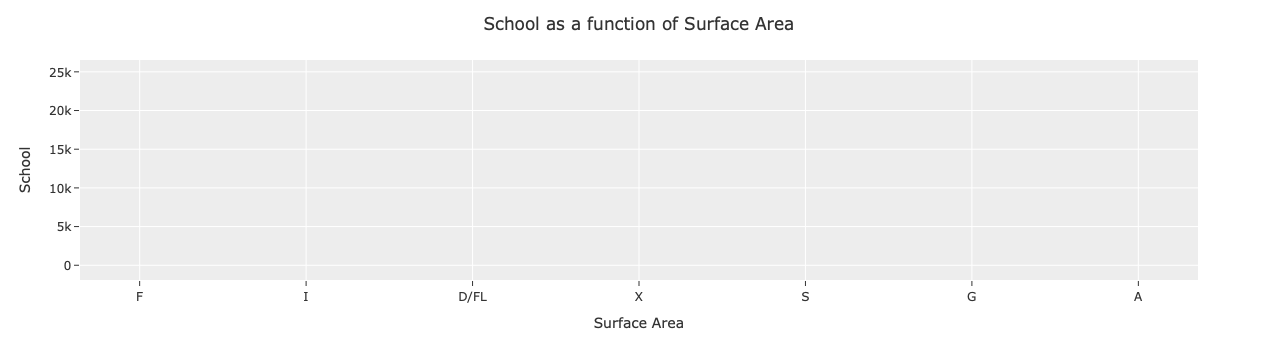

Model Score:
0.03466390499901184


In [173]:
my_columns = ['Surface','school_pntg']
DF_school = DF[my_columns]

DF_school.dropna(inplace=True)
DF_school['Surface'] = DF_school['Surface'].apply(lambda x: float(x))

fig = px.scatter(DF_school,
                 x='school_pntg',
                 y='Surface',
                 color_discrete_sequence=['black'],
                 opacity=0.2)

fig.update_layout(template="ggplot2",
                  title='School as a function of Surface Area',
                  title_x=0.5,
                  xaxis_title='Surface Area',
                  yaxis_title='School')


fig.show()

X = DF_school['school_pntg'].values.reshape(-1,1)
y = DF_school['Surface'].values

encoder = OneHotEncoder()
X = encoder.fit_transform(X)
categories = encoder.categories_[0]

LM = LinearRegression()

LM.fit(X, y)

print('Model Score:')
print(LM.score(X,y))

In [174]:
print(LM.coef_)
print('------------------------------')
print(LM.intercept_)

[-392.0740555  -266.70349531  122.28773892 -393.21155589  142.65081905
 1051.64022988 -264.58968116]
------------------------------
686.0740429004898


#### Look at the output, what does it mean? - Which school of paintings on average are largest? smallest?
#### this means that the school with the largest paintings on average was school F and the school with the smallest paitintgs on average was school A. we can see this in how far in height each schools line of dots is.